# Linear Regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()

bostonDF= pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터셋 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**각 컬럼별로 주택가격에 미치는 영향도를 조사**

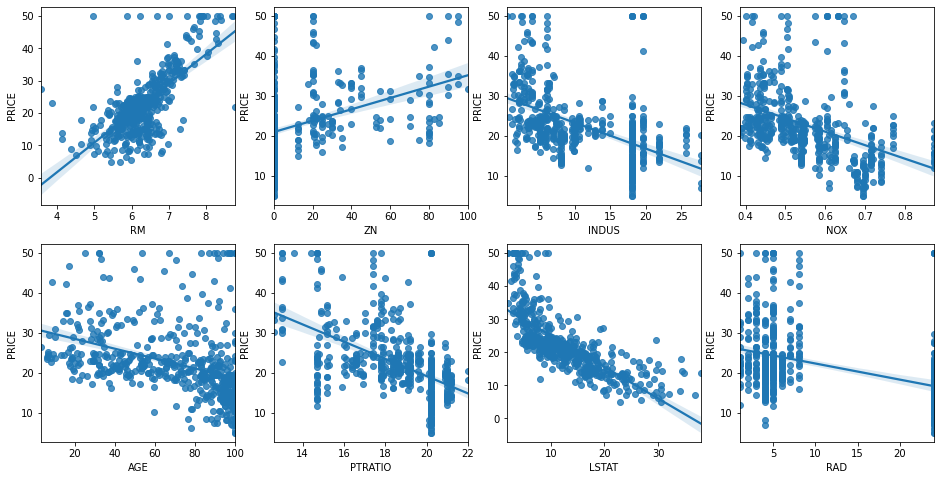

In [6]:
fig, axs= plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4

  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

데이터 세트 train, test로 분리하고 학습/예측/평가 수행

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data,y_target, test_size=0.3, random_state=156)

## Linear Regression OLS
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0: .3f}, RMSE : {1: .3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE :  17.297, RMSE :  4.159
Variance score : 0.757


In [8]:
print('절편값:', lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))

절편값: 40.995595172164755
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [9]:
## 회귀 계수를 큰 값 순으로 정렬
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

NOX 값이 몹시 크다.

In [11]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

## cross_val_score()로 5 Fold 셋으로 MSE를 구한 뒤 RMSE 계산
neg_mse_scores = cross_val_score(lr,X_data,y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores =  np.sqrt(-1 * neg_mse_scores) # 다시 반환된 값에 -1을 곱해야 원래 모델에서 계산된 MSE값
avg_rmse = np.mean(rmse_scores)

## cross_val_score(scoring="neg_mse_scores"로 반환된 값은 모두 음수) 
print("5 folds의 개별 Negative MSE scores:", np.round(neg_mse_scores,2))
print("5 folds의 개별 RMSE scores:", np.round(rmse_scores,2))
print("5 folds의 평균 RMSE scores:", np.round(avg_rmse,2))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE scores: 5.83


사이킷런의 지표평가 기준은 높은 지표 값일수록 좋은 모델로 판단하는데,
회귀는 MSE 값이 낮을수록 좋은 회귀모델이다.
따라서 metric 평가 기준에 MSE를 부합시키기 위해 계산된 값에 -1을 곱해서 반환

# Polynomial Regression - 다항회귀

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np

# dataset load
boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기:', bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

## Pipeline
p_model = Pipeline([('poly',PolynomialFeatures(degree=2, include_bias=False)),
                    ('linear',LinearRegression())])
p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:3f}, RMSE : {1: .3f}'.format(mse, rmse))
print('Variance Score : {0: .3f}'.format(r2_score(y_test,y_preds)))

Boston 데이터셋 크기: (506, 14)
MSE : 15.555752, RMSE :  3.944
Variance Score :  0.782


## Ridge Regression
* 규제 선형회귀 유형
* w의 제곱에 패널티 부여 - 계수 값의 크기조정
* (Lasso는 w의 절댓값에 패널티 부여 - 피처의 개수를 줄임)
* (Elastic Net은 둘을 혼합)

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# dataset load
boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기:', bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1, inplace=False)

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("5 folds의 개별 Negative MSE scores:", np.round(neg_mse_scores,2))
print("5 folds의 개별 RMSE scores:", np.round(rmse_scores,2))
print("5 folds의 평균 RMSE scores:", np.round(avg_rmse,2))



Boston 데이터셋 크기: (506, 14)
5 folds의 개별 Negative MSE scores: [-11.42 -24.29 -28.14 -74.6  -28.52]
5 folds의 개별 RMSE scores: [3.38 4.93 5.31 8.64 5.34]
5 folds의 평균 RMSE scores: 5.52


In [20]:
# alpha 파라미터의 값을 다르게 설정하면서 RMSE 확인
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas : 
  ridge = Ridge(alpha = alpha)

  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print("alpha : {0} 일 때 5 folds의 평균 RMSE : {1: .3f}" .format(alpha, avg_rmse))

alpha : 0 일 때 5 folds의 평균 RMSE :  5.829
alpha : 0.1 일 때 5 folds의 평균 RMSE :  5.788
alpha : 1 일 때 5 folds의 평균 RMSE :  5.653
alpha : 10 일 때 5 folds의 평균 RMSE :  5.518
alpha : 100 일 때 5 folds의 평균 RMSE :  5.330


시각화

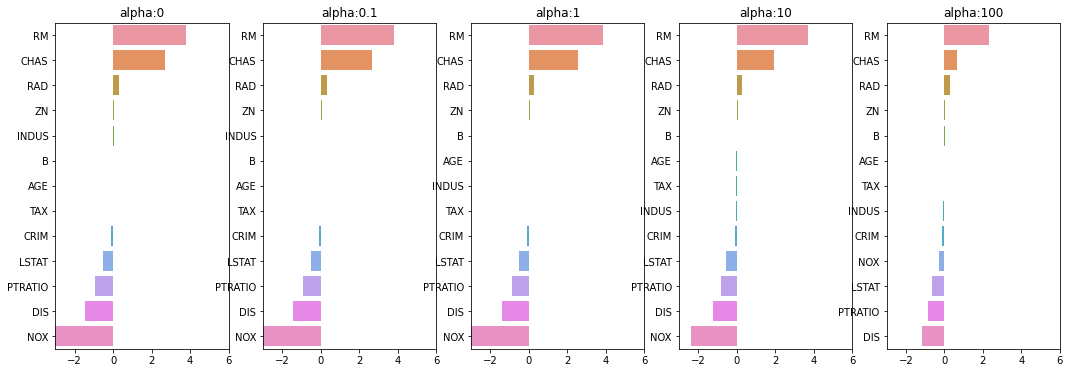

In [22]:
fog , axs = plt.subplots(figsize=(18,6), nrows=1,ncols=5)
coeff_df = pd.DataFrame() #alpha에 따른 회귀계수 값 저장

for pos , alpha in enumerate(alphas) :
  ridge = Ridge(alpha= alpha)
  ridge.fit(X_data,y_target) #학습

  #alpha에 따른 회귀 계수를 Series화
  coeff = pd.Series(data=ridge.coef_ , index=X_data.columns)
  colname = 'alpha:'+str(alpha)
  coeff_df[colname] = coeff

  #시각화
  coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()


In [25]:
ridge_alphas =[0,0.1,1,10,100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


## Lasso Regression

In [29]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
  coeff_df = pd.DataFrame()
  if verbose : print('######', model_name , '######')
  for param in params:
    if model_name =='Ridge' : model = Ridge(alpha=param)
    elif model_name == 'Lasso': model = Lasso(alpha=param)
    elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)

    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일 때 5 fold의 평균 RMSE : {1: .3f}'.format(param,avg_rmse))

    model.fit(X_data,y_target)

    coeff = pd.Series(data=model.coef_ , index=X_data.columns)
    colname = 'alpha'+str(param)
    coeff_df[colname] = coeff
  return coeff_df

In [30]:
lasso_alphas=[0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

###### Lasso ######
alpha 0.07일 때 5 fold의 평균 RMSE :  5.612
alpha 0.1일 때 5 fold의 평균 RMSE :  5.615
alpha 0.5일 때 5 fold의 평균 RMSE :  5.669
alpha 1일 때 5 fold의 평균 RMSE :  5.776
alpha 3일 때 5 fold의 평균 RMSE :  6.189


In [31]:
sort_column= 'alpha'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column,ascending=False)

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


## Elastic net

In [34]:
Elastic_alphas=[0.07,0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

###### ElasticNet ######
alpha 0.07일 때 5 fold의 평균 RMSE :  5.542
alpha 0.1일 때 5 fold의 평균 RMSE :  5.526
alpha 0.5일 때 5 fold의 평균 RMSE :  5.467
alpha 1일 때 5 fold의 평균 RMSE :  5.597
alpha 3일 때 5 fold의 평균 RMSE :  6.068


In [35]:
sort_column= 'alpha'+str(Elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column,ascending=False)

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


0.5